In [1]:
# the series can include trend and seaosonality

In [2]:
import pandas as pd
import evds as e
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
with open("api_key.txt", "r") as f:
    api_key = f.read()

In [4]:
evds = e.evdsAPI(api_key)

In [5]:
data = evds.get_data(["TP.GSYIH26.HY.ZH"], startdate="1-1-1998", enddate="1-1-2023")
data.head()

,Tarih,TP_GSYIH26_HY_ZH
0,1998-Q1,158124477.531
1,1998-Q2,172112469.040
2,1998-Q3,195309243.856
3,1998-Q4,185211147.696
4,1999-Q1,148678773.408


In [6]:
data["Tarih"] = pd.date_range("1998-01-01", periods=len(data), freq="Q")
data.columns = ["Tarih", "GSYIH"]
data.set_index("Tarih", inplace=True)

In [7]:
data.head()

,GSYIH
Tarih,
1998-03-31,158124477.531
1998-06-30,172112469.040
1998-09-30,195309243.856
1998-12-31,185211147.696
1999-03-31,148678773.408


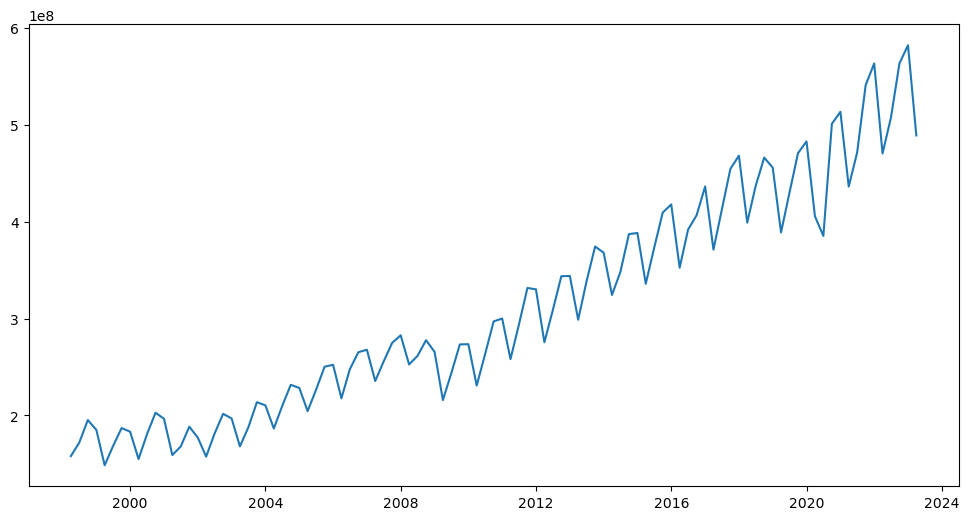

In [8]:
plt.figure(figsize=(12,6))
plt.plot(data)
plt.show();

In [9]:
tes = ExponentialSmoothing(data["GSYIH"], trend="add", seasonal="add", seasonal_periods=4)
model = tes.fit(smoothing_level=0.5, smoothing_trend=0.5, smoothing_seasonal=0.5)
forecast = model.forecast(24)
forecast

C:\Users\htcso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


2023-06-30   515686891.570
2023-09-30   573675185.841
2023-12-31   594056239.777
2024-03-31   502852832.825
2024-06-30   528630314.627
2024-09-30   586618608.899
2024-12-31   606999662.834
2025-03-31   515796255.882
2025-06-30   541573737.685
2025-09-30   599562031.956
2025-12-31   619943085.892
2026-03-31   528739678.940
2026-06-30   554517160.742
2026-09-30   612505455.013
2026-12-31   632886508.949
2027-03-31   541683101.997
2027-06-30   567460583.799
2027-09-30   625448878.070
2027-12-31   645829932.006
2028-03-31   554626525.054
2028-06-30   580404006.856
2028-09-30   638392301.128
2028-12-31   658773355.063
2029-03-31   567569948.111
Freq: Q-DEC, dtype: float64

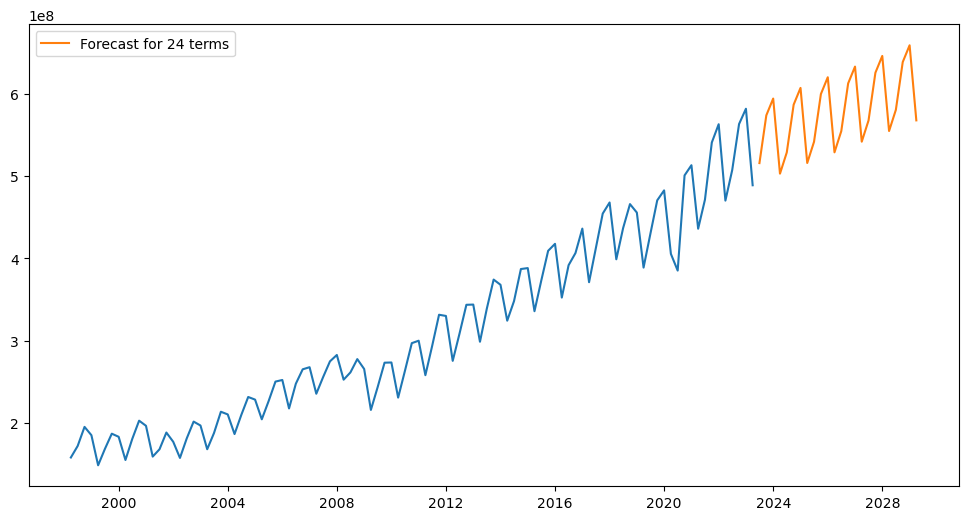

In [10]:
plt.figure(figsize=(12,6))
plt.plot(data)
plt.plot(forecast, label = "Forecast for 24 terms")
plt.legend()
plt.show();

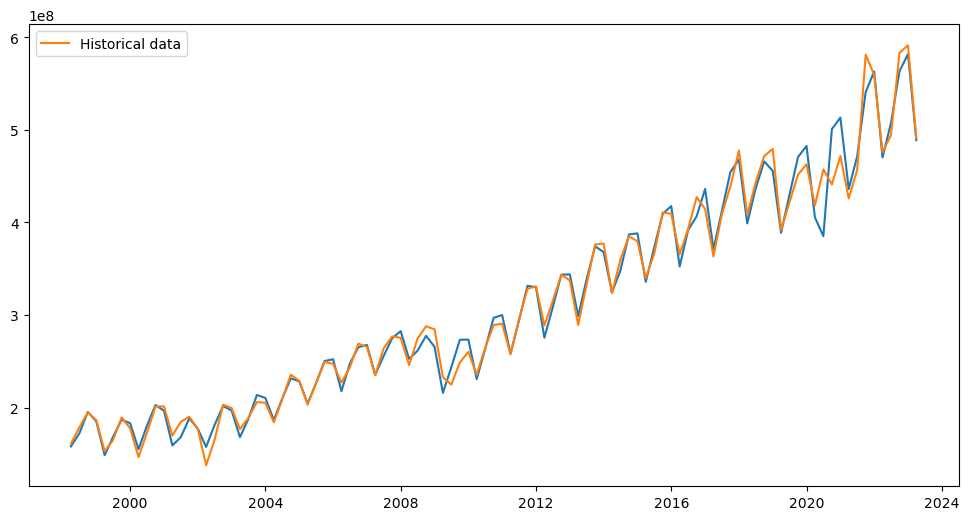

In [11]:
history = model.fittedvalues

plt.figure(figsize=(12,6))
plt.plot(data)
plt.plot(history, label = "Historical data")
plt.legend()
plt.show();